In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Define function

def F(x):
    return 3*x**2

In [21]:
# 1. Trapezoidal rule 
number = 1000
delta_x = 1/number
area = 0

for i in range(number):  
    x_i = i * delta_x
    x_i_1 = (i+1)*delta_x
    area += (F(x_i)+F(x_i_1))/2*delta_x
    
print("The integral approximated by the trapezoidal rule of 3x^2 from 0 to 1 is:",area)      

The integral approximated by the trapezoidal rule of 3x^2 from 0 to 1 is: 1.0000004999999996


Mean: 0.9993449488041749
Variance: 0.0008114013382882842


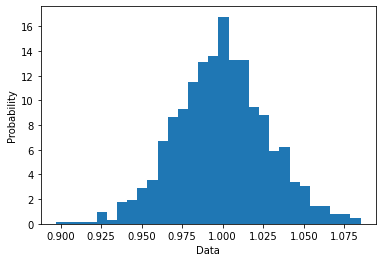

In [180]:
# 2. Monte Carlo with importance sampling and g(x)=1 as weighting function

number = 1000

def f(x):
    return 3*x**2
def g(x): 
    return 1


integral = []

for j in range(1000):
    sum_f = 0 
    for i in range(number):
        x = np.random.uniform(0, 1)
        sum_f += f(x)
    integral.append(sum_f / number)
    
# Plot histogram

plt.hist(integral, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
print("Mean:", np.mean(integral))
print("Variance:", np.var(integral))

Monte Carlo integration result: 0.9991460813111074
Mean: 0.9998936696333313
Variance: 1.2152590406966745e-05


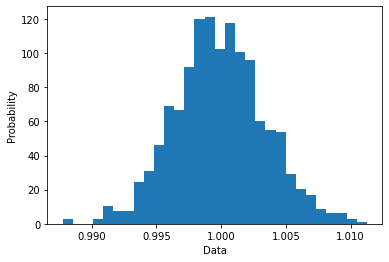

In [60]:
# 3. Monte Carlo with importance sampling and g(x)=2x as weighting function

import random
import matplotlib.pyplot as plt
import numpy as np

# Define the functions f(x) and g(x)
def f(x):
    return 3*x**2

def g(x):
    return 2*x

# Set the number of samples to use
num_samples = 20000

# Define the integration interval [a, b]
a = 0
b = 1

# Calculate the maximum value of f(x)/g(x) in the integration interval
max_fg = f(b)/g(b)


# Initialize the integral estimate and the sum of weights

integral_array = []

# Generate random samples and accumulate the estimate and weights
for j in range(1000):
    integral = 0
    sum_weights = 0   
    for i in range(num_samples):
        # Generate a random sample using g(x) as the probability density function
        x = random.uniform(a, b)
        w = f(x)/g(x)
        if w >= random.uniform(0, max_fg):
            # If the weight is above the acceptance threshold, add it to the estimate and the sum of weights
            integral += w
            sum_weights += 1

# Calculate the final integral estimate
    integral /= sum_weights
    integral_array.append(integral)
    

# Print the result
print("Monte Carlo integration result:", integral)
plt.hist(integral_array, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
print("Mean:", np.mean(integral_array))
print("Variance:", np.var(integral_array))

The variance with 10000 samples is ca. 2.62*10^-5 and reduces to 1.21*10^-5 when 20000 samples are considered. As we doubled the number of samples the variance approximately halved. The relationship is thus var α 1/N.

Monte Carlo integration result: 1.0005049330273208
Mean: 0.9999613826732671
Variance: 6.586769535305426e-06


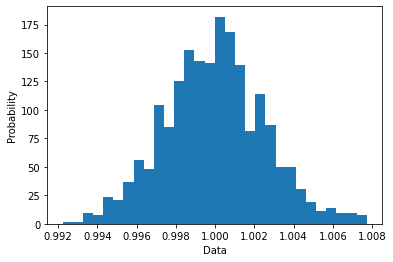

In [58]:
# 4. Monte Carlo with importance sampling and g(x)=4x^3 as weighting function

import random

def f(x):
    return 3*x**2

def g(x):
    return 4*x**3

# Number of samples to use
N = 20000

# Define the range of integration
a = 0
b = 1
integral_array = []

for j in range(1000):
    # Generate N samples from the importance sampling distribution
    samples = [((random.uniform(0, 1))**(1/4)) for i in range(N)]

    # Calculate the estimate of the integral using the samples
    integral = sum([f(sample)/g(sample) for sample in samples])/N*(b-a)
    integral_array.append(integral)
    
print("Monte Carlo integration result:", integral)
plt.hist(integral_array, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
print("Mean:", np.mean(integral_array))
print("Variance:", np.var(integral_array))

The variance is ca. 1.25*10^-5 when using 10000 samples and 6.6*10^-6 when using 20000 samples. As we doubled the number of samples the variance halved. The relationship is thus var α 1/N.

Monte Carlo integration result: 0.9976242596981478
Mean: 0.9999121630101135
Variance: 6.2917163692760275e-06


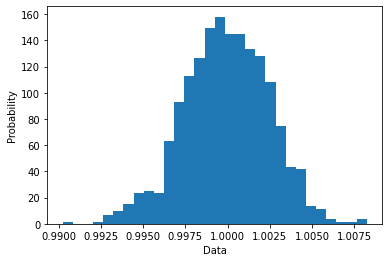

In [57]:
# 5. Monte Carlo with importance sampling and g(x)=2x as weighting function 

import random

def f(x):
    return 3*x**2

def g(x):
    return 2*x

# Number of samples to use
N = 20000

# Define the range of integration
a = 0
b = 1
integral_array = []

for j in range(1000):
    # Generate N samples from the importance sampling distribution
    integral = 0
    samples = []
    for i in range(N):
        random_no = random.uniform(0, 1)**(1/2) # Where does the 1/2 exponent come from?
        samples.append(random_no)

    # Calculate the estimate of the integral using the samples
    for k in samples:
        integral += f(k)/g(k)/N*(b-a) 
    integral_array.append(integral)
    
print("Monte Carlo integration result:", integral)
plt.hist(integral_array, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
print("Mean:", np.mean(integral_array))
print("Variance:", np.var(integral_array))

The variance is around 1.25*10^-5 when using 10000 samples and ca. 6.3*10^-6 when using 2000 samples. As we doubled the number of samples the variance halved. The relationship is thus var α 1/N.

b) Better weighting function
In general, the optimal weighting function is one that approximates the integrand well and has a simple form that allows for efficient sampling. Ideally, the weighting function should have a similar shape to the integrand, and should be non-negative over the entire domain of integration.
The weighting function g(x) = 2x is the best possible one since it samples more often in the domain where the integrand value is highest. On the other hand, a weighting funtion of the form 4x^3 also gives good results as seen by the fact that its variance is very similar to that obtained with g(x)=2x.